In [33]:
from collections import defaultdict

import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from scipy.cluster import hierarchy

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [34]:
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [35]:
cp = pd.read_csv("../../CenterMeanOVLP.csv") 
cp = cp.loc[:,cp.apply(pd.Series.nunique) != 1]
cp


,Unnamed: 0,Cells_AreaShape_Area,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_MajorAxisLength,Cells_AreaShape_MaxFeretDiameter,...,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0,smiles_r
0,0,-53.322266,15.138672,-7.832031,0.020546,0.011831,-0.005042,0.006361,1.567715,1.506277,...,0.007785,0.019312,0.020843,-0.064662,-0.072990,-0.084042,0.215716,0.155296,0.176099,Brc1c(NC2=NCCN2)ccc2nccnc12
1,1,41.678711,1.973633,-8.867188,0.008705,0.008857,-0.001514,-0.009787,0.946463,1.437743,...,-0.018887,-0.003844,-0.019000,0.007360,0.025757,0.027188,0.088701,0.052283,0.062916,c1ccc(C(O[C@@H]2CCCN(CCc3ccc4c(c3)OCO4)C2)c2cc...
2,2,418.492188,6.976562,7.766602,0.023997,0.005404,-0.005869,-0.024194,6.252890,6.685650,...,-0.105881,0.011543,0.004370,-0.208441,-0.081369,-0.084740,-0.095445,-0.015152,-0.045636,c1cnc(N2CCN(Cc3ccc4c(c3)OCO4)CC2)nc1
3,3,-10.445312,0.101562,-0.045898,-0.003597,0.000294,0.002599,-0.001359,-0.473211,-0.001053,...,-0.024427,-0.053814,-0.040165,-0.066490,-0.036203,-0.040287,0.040549,0.026975,0.027425,c1ccc(C2CC2)c(OCC2=NCCN2)c1
4,4,48.655273,1.666992,2.486328,0.018529,0.011256,-0.002420,0.004862,1.776159,1.611745,...,0.116695,0.172022,0.164453,-0.012553,0.000800,-0.010659,0.088510,0.083851,0.076598,C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,641,-133.445312,-2.585938,-4.170898,-0.006187,-0.002578,-0.001801,-0.007760,-2.365016,-2.547309,...,-0.069310,-0.098329,-0.084651,-0.048275,-0.071216,-0.062632,-0.079043,-0.088448,-0.085335,c1ccc2c(c1)[nH]c1cnccc12
642,642,-26.469727,-0.145508,-0.763672,-0.006640,-0.000166,0.001977,-0.003229,-0.770855,-0.478971,...,-0.040332,-0.035610,-0.022689,-0.003744,-0.012261,-0.003150,-0.006708,-0.009239,-0.004748,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34
643,643,215.939732,2.107143,-7.992188,0.014079,0.009538,-0.005964,0.005382,3.785917,4.371880,...,-0.084987,-0.049924,-0.072038,-0.012332,0.017893,0.006418,0.005525,0.026849,0.029421,c1ccc(-c2ccc(C(c3ccccc3)n3ccnc3)cc2)cc1
644,644,1810.023438,4.320312,-1.496094,0.085425,0.025699,-0.030275,-0.063700,27.234844,31.637251,...,0.243208,0.345452,0.292939,0.108634,0.165323,0.152386,-0.089590,-0.020275,-0.033736,c1cnc2c(c1)ccc1cccnc12


In [36]:
toxcast = pd.read_csv("../../toxcast_Overlap.csv") 
toxcast

,Unnamed: 0,ACEA_T47D_80hr_Negative,ACEA_T47D_80hr_Positive,APR_HepG2_CellCycleArrest_24h_dn,APR_HepG2_CellCycleArrest_24h_up,APR_HepG2_CellCycleArrest_72h_dn,APR_HepG2_CellLoss_24h_dn,APR_HepG2_CellLoss_72h_dn,APR_HepG2_MicrotubuleCSK_24h_dn,APR_HepG2_MicrotubuleCSK_24h_up,...,Tanguay_ZF_120hpf_PE_up,Tanguay_ZF_120hpf_PFIN_up,Tanguay_ZF_120hpf_PIG_up,Tanguay_ZF_120hpf_SNOU_up,Tanguay_ZF_120hpf_SOMI_up,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_TR_up,Tanguay_ZF_120hpf_YSE_up,smiles_r
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NCc1ccccc1
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C=CCN1CCc2nc(N)sc2CC1
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COc1cc(-c2ccc(=O)[nH]n2)ccc1OC(F)F
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC1(C)CCC(C)(C)c2cc(C(=O)Nc3ccc(C(=O)O)cc3)ccc21
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COc1ccc(Cl)cc1C(=O)NCCc1ccc(S(=O)(=O)NC(=O)NC2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,641,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC(C)(C)NC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4NC(...
642,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O=C(O)c1ccc2[nH]cc(CCCCN3CC=C(c4ccccc4)CC3)c2c1
643,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clc1cccc(SC2CCNCC2)n1
644,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCN(CC)CCOc1ccc(Cc2ccccc2)cc1


In [38]:
tox_list1=[ 'BSK_hDFCGF_Proliferation_down',
             'APR_HepG2_CellLoss_72h_dn',
             'BSK_3C_Proliferation_down',
             'BSK_SAg_Proliferation_down',
             'BSK_3C_SRB_down',
             'BSK_3C_Vis_down',
             'APR_HepG2_CellLoss_24h_dn',
             'BSK_LPS_SRB_down',
             'BSK_CASM3C_Proliferation_down',
             'BSK_SAg_SRB_down',
             'BSK_4H_SRB_down',
             'ACEA_T47D_80hr_Negative'
             'smiles_r']

tox_list=[    'BSK_hDFCGF_Proliferation_down',
             'APR_HepG2_CellLoss_72h_dn',
             'BSK_3C_Proliferation_down',
             'BSK_SAg_Proliferation_down',
             'BSK_3C_SRB_down',
             'BSK_3C_Vis_down',
             'APR_HepG2_CellLoss_24h_dn',
             'BSK_LPS_SRB_down',
             'BSK_CASM3C_Proliferation_down',
             'BSK_SAg_SRB_down',
             'BSK_4H_SRB_down',
             'ACEA_T47D_80hr_Negative' ]

In [39]:
our_data=toxcast.reindex(columns=tox_list)

In [40]:
our_data

,BSK_hDFCGF_Proliferation_down,APR_HepG2_CellLoss_72h_dn,BSK_3C_Proliferation_down,BSK_SAg_Proliferation_down,BSK_3C_SRB_down,BSK_3C_Vis_down,APR_HepG2_CellLoss_24h_dn,BSK_LPS_SRB_down,BSK_CASM3C_Proliferation_down,BSK_SAg_SRB_down,BSK_4H_SRB_down,ACEA_T47D_80hr_Negative
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import cDataStructs
import seaborn as sns
import matplotlib.pyplot as plt
import rdkit.Chem.Descriptors
from rdkit import Chem
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import Descriptors
from rdkit.Chem.rdmolops import RDKFingerprint
from rdkit.Chem.rdMolDescriptors import *
from rdkit.Chem.EState.Fingerprinter import FingerprintMol
from rdkit.Avalon.pyAvalonTools import GetAvalonFP #GetAvalonCountFP  #int vector version
from rdkit.Chem.AllChem import  GetMorganFingerprintAsBitVect, GetErGFingerprint
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import rdkit.DataStructs.cDataStructs
from rdkit.Avalon.pyAvalonTools import GetAvalonFP

def MorganFingerprint(s):
    x = Chem.MolFromSmiles(s)
    return (AllChem.GetMorganFingerprintAsBitVect(x,2,2048))


In [42]:
from sklearn.feature_selection import VarianceThreshold



In [43]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [44]:
from sklearn.feature_selection import VarianceThreshold
from numpy  import array



In [45]:
from scipy import stats
from scipy.stats import ks_2samp 
#Calculates a point biserial correlation coefficient and the associated p-value.

    


In [46]:
from sklearn.preprocessing import LabelBinarizer # one hot encoding
from sklearn.preprocessing import PolynomialFeatures # add polynomial features
from sklearn.linear_model import LogisticRegression
import seaborn as sns
 #Grid Search with Cross Validation RF
from sklearn import metrics


from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search

In [47]:
from sklearn import datasets, metrics, model_selection, svm
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from matplotlib import gridspec

from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors,Crippen

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GroupKFold

In [48]:
def GetExactMolWt(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.ExactMolWt (mol))
def GetCalcTPSA(s):
    mol = Chem.MolFromSmiles(s)
    return (Chem.rdMolDescriptors.CalcTPSA(mol))
def GetNumRotatableBonds(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumRotatableBonds (mol))
def GetNumHDonors(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumHDonors(mol))
def GetNumHAcceptors(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumHAcceptors(mol) )
def GetMolLogP(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.MolLogP(mol))

Start
1.0    56
0.0    50
Name: BSK_hDFCGF_Proliferation_down, dtype: int64


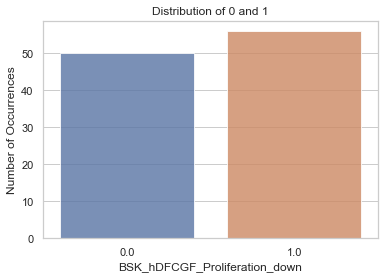

Total Compounds in Assay:  106
106
106
pca explained variance by first two components:  0.7210227204267772


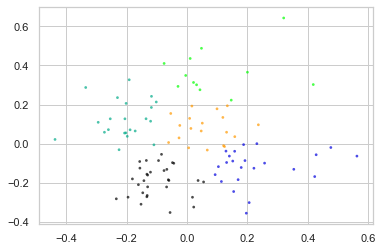

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


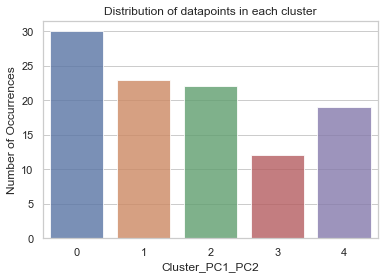

Total Selected CP features:  62
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   21.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   48.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 6 16]
 [ 1  7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.86      0.27      0.41        22
         1.0       0.30      0.88      0.45         8

    accuracy                           0.43        30
   macro avg       0.58      0.57      0.43        30
weighted avg       0.71      0.43      0.42        30

Total Selected CP features:  49
Total Selected train:  8

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  6]
 [ 0  6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      0.65      0.79        17
         1.0       0.50      1.00      0.67         6

    accuracy                           0.74        23
   macro avg       0.75      0.82      0.73        23
weighted avg       0.87      0.74      0.75        23

Total Selected CP features:  269
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.6min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 1  0]
 [17  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.06      1.00      0.11         1
         1.0       1.00      0.19      0.32        21

    accuracy                           0.23        22
   macro avg       0.53      0.60      0.21        22
weighted avg       0.96      0.23      0.31        22

Total Selected CP features:  125
Total Selected train:  87


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[5 4]
 [6 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.45      0.56      0.50         9
         1.0       0.50      0.40      0.44        10

    accuracy                           0.47        19
   macro avg       0.48      0.48      0.47        19
weighted avg       0.48      0.47      0.47        19

Total Selected CP features:  31
Total Selected train:  94
Tota

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   40.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[1 0]
 [2 9]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.33      1.00      0.50         1
         1.0       1.00      0.82      0.90        11

    accuracy                           0.83        12
   macro avg       0.67      0.91      0.70        12
weighted avg       0.94      0.83      0.87        12



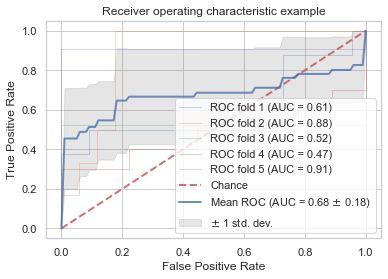

Mean of Each fold


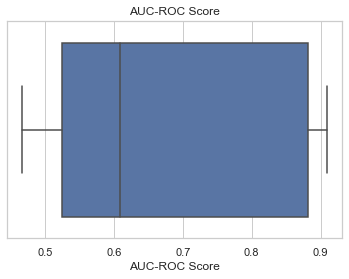

AUC-ROC all:  [0.6079545454545454, 0.8823529411764706, 0.5238095238095238, 0.4666666666666667, 0.9090909090909091]
AUC-ROC = 0.68 ± 0.18)


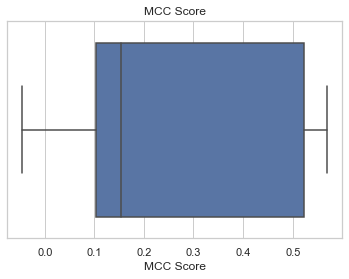

Matthews_corrcoef all:  [0.15445574836957118, 0.5687964589945211, 0.10286889997472794, -0.044946657497549475, 0.5222329678670935]
Matthews_corrcoef = 0.261 ± 0.242)


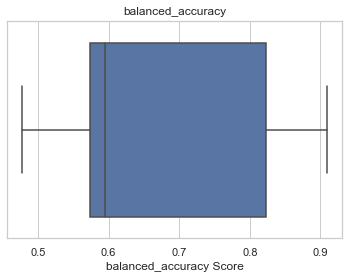

balanced_accuracy all:  [0.5738636363636364, 0.8235294117647058, 0.5952380952380952, 0.4777777777777778, 0.9090909090909092]
balanced_accuracy = 0.68 ± 0.16)


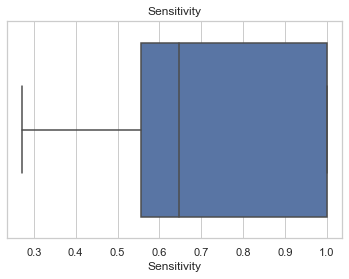

Sensitivity all:  [0.2727272727272727, 0.6470588235294118, 1.0, 0.5555555555555556, 1.0]
Sensitivity = 0.70 ± 0.28)


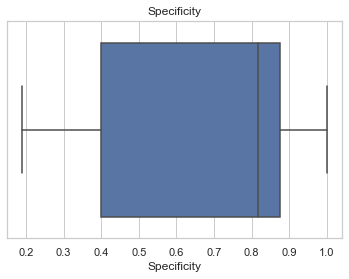

Specificity all:  [0.875, 1.0, 0.19047619047619047, 0.4, 0.8181818181818182]
Specificity = 0.66 ± 0.31)
One Combined Confusion Matrix
conf_matrix: 
  [[24 26]
 [26 30]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.48      0.48      0.48        50
         1.0       0.54      0.54      0.54        56

    accuracy                           0.51       106
   macro avg       0.51      0.51      0.51       106
weighted avg       0.51      0.51      0.51       106

matthews_corrcoef
0.015714285714285715
balanced_accuracy_score
0.5078571428571428
Sensitivity
0.48
Specificity
0.5357142857142857
AUC-ROC for the combined results: 


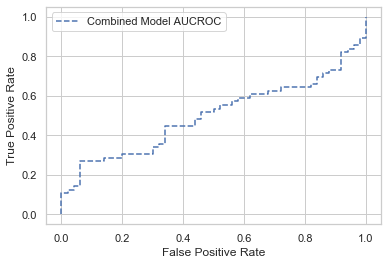

Combined Model AUC ROC:  0.49785714285714283
Start
1.0    45
0.0    43
Name: APR_HepG2_CellLoss_72h_dn, dtype: int64


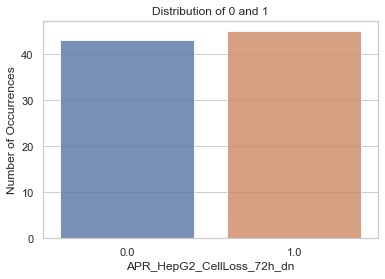

Total Compounds in Assay:  88
88
88
pca explained variance by first two components:  0.7196696700655922


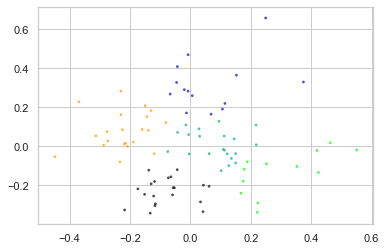

Start
4    21
2    21
0    20
1    14
3    12
Name: Cluster_PC1_PC2, dtype: int64


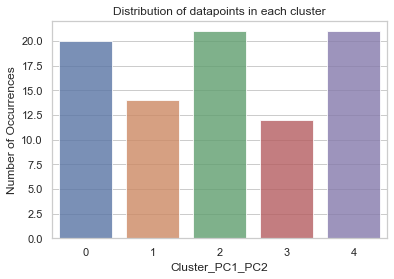

Total Selected CP features:  246
Total Selected train:  67
Total Selected test:  21
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 3  0]
 [16  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.16      1.00      0.27         3
         1.0       1.00      0.11      0.20        18

    accuracy                           0.24        21
   macro avg       0.58      0.56      0.24        21
weighted avg       0.88      0.24      0.21        21

Total Selected CP features:  92
Total Selected train:  67
T

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 6]
 [4 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      0.50      0.55        12
         1.0       0.45      0.56      0.50         9

    accuracy                           0.52        21
   macro avg       0.53      0.53      0.52        21
weighted avg       0.54      0.52      0.53        21

Total Selected CP features:  41
Total Selected train:  68
Total

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  7]
 [ 1  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.91      0.59      0.71        17
         1.0       0.22      0.67      0.33         3

    accuracy                           0.60        20
   macro avg       0.57      0.63      0.52        20
weighted avg       0.81      0.60      0.66        20

Total Selected CP features:  44
Total Selected train:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[2 1]
 [4 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.33      0.67      0.44         3
         1.0       0.88      0.64      0.74        11

    accuracy                           0.64        14
   macro avg       0.60      0.65      0.59        14
weighted avg       0.76      0.64      0.67        14

Total Selected CP features:  83
Total Selected train:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 2]
 [2 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      0.75      0.75         8
         1.0       0.50      0.50      0.50         4

    accuracy                           0.67        12
   macro avg       0.62      0.62      0.62        12
weighted avg       0.67      0.67      0.67        12



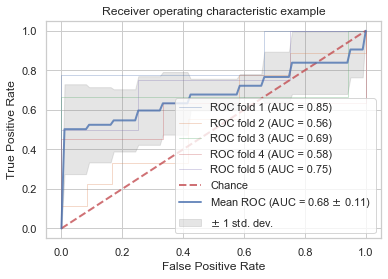

Mean of Each fold


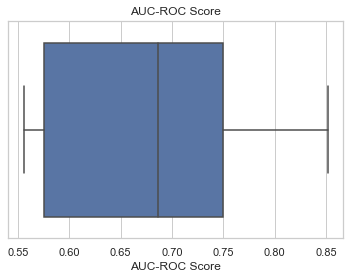

AUC-ROC all:  [0.8518518518518519, 0.5555555555555556, 0.6862745098039216, 0.5757575757575758, 0.75]
AUC-ROC = 0.68 ± 0.11)


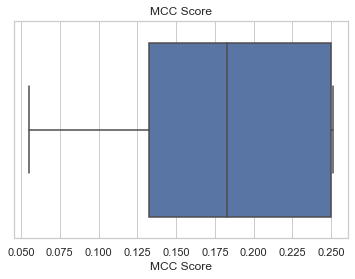

Matthews_corrcoef all:  [0.13245323570650439, 0.05504818825631803, 0.1829534767323246, 0.251259453814803, 0.25]
Matthews_corrcoef = 0.174 ± 0.074)


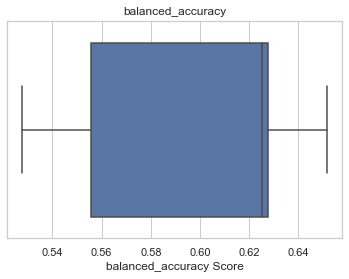

balanced_accuracy all:  [0.5555555555555556, 0.5277777777777778, 0.6274509803921569, 0.6515151515151515, 0.625]
balanced_accuracy = 0.60 ± 0.05)


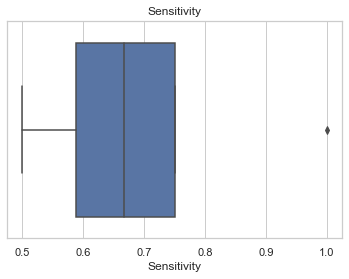

Sensitivity all:  [1.0, 0.5, 0.5882352941176471, 0.6666666666666666, 0.75]
Sensitivity = 0.70 ± 0.17)


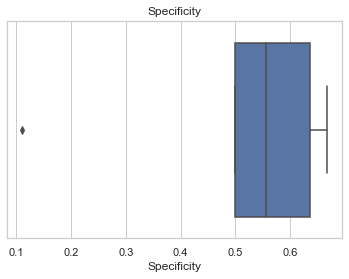

Specificity all:  [0.1111111111111111, 0.5555555555555556, 0.6666666666666666, 0.6363636363636364, 0.5]
Specificity = 0.49 ± 0.20)
One Combined Confusion Matrix
conf_matrix: 
  [[27 16]
 [27 18]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      0.63      0.56        43
         1.0       0.53      0.40      0.46        45

    accuracy                           0.51        88
   macro avg       0.51      0.51      0.51        88
weighted avg       0.52      0.51      0.51        88

matthews_corrcoef
0.02864949272941025
balanced_accuracy_score
0.5139534883720931
Sensitivity
0.627906976744186
Specificity
0.4
AUC-ROC for the combined results: 


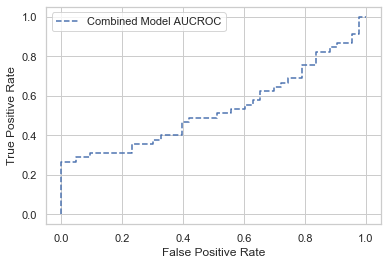

Combined Model AUC ROC:  0.5312661498708011
Start
1.0    54
0.0    52
Name: BSK_3C_Proliferation_down, dtype: int64


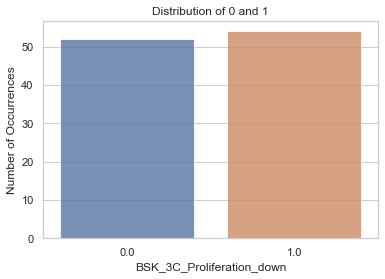

Total Compounds in Assay:  106
106
106
pca explained variance by first two components:  0.7210227204267772


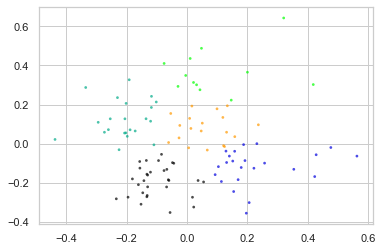

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


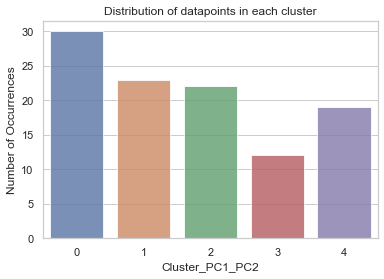

Total Selected CP features:  82
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  7]
 [ 6  6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.65      0.61      0.63        18
         1.0       0.46      0.50      0.48        12

    accuracy                           0.57        30
   macro avg       0.55      0.56      0.55        30
weighted avg       0.57      0.57      0.57        30

Total Selected CP features:  55
Total Selected train:  8

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  5]
 [ 2  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.87      0.72      0.79        18
         1.0       0.38      0.60      0.46         5

    accuracy                           0.70        23
   macro avg       0.62      0.66      0.62        23
weighted avg       0.76      0.70      0.72        23

Total Selected CP features:  172
Total Selected trai

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 2  0]
 [13  7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.13      1.00      0.24         2
         1.0       1.00      0.35      0.52        20

    accuracy                           0.41        22
   macro avg       0.57      0.68      0.38        22
weighted avg       0.92      0.41      0.49        22

Total Selected CP features:  60
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[5 7]
 [3 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.42      0.50        12
         1.0       0.36      0.57      0.44         7

    accuracy                           0.47        19
   macro avg       0.49      0.49      0.47        19
weighted avg       0.53      0.47      0.48        19

Total Selected CP features:  25
Total Selected train:  94
Total

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[2 0]
 [3 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.40      1.00      0.57         2
         1.0       1.00      0.70      0.82        10

    accuracy                           0.75        12
   macro avg       0.70      0.85      0.70        12
weighted avg       0.90      0.75      0.78        12



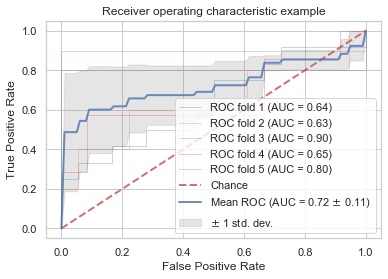

Mean of Each fold


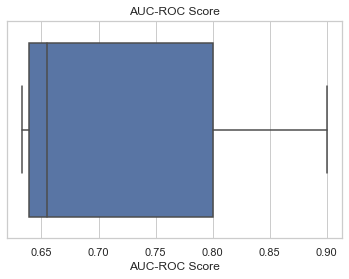

AUC-ROC all:  [0.638888888888889, 0.6333333333333333, 0.9, 0.6547619047619048, 0.8]
AUC-ROC = 0.73 ± 0.11)


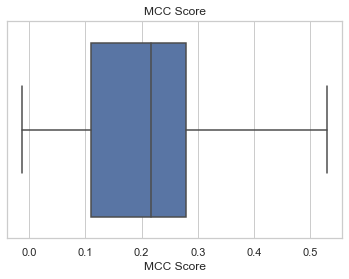

Matthews_corrcoef all:  [0.10984700727621793, 0.2790526301083191, 0.2160246899469287, -0.011631052629980886, 0.5291502622129182]
Matthews_corrcoef = 0.224 ± 0.182)


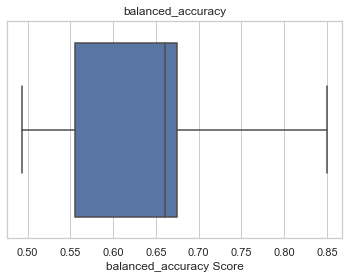

balanced_accuracy all:  [0.5555555555555556, 0.6611111111111111, 0.675, 0.49404761904761907, 0.85]
balanced_accuracy = 0.65 ± 0.12)


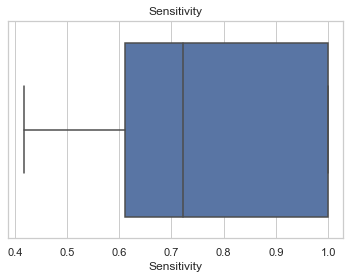

Sensitivity all:  [0.6111111111111112, 0.7222222222222222, 1.0, 0.4166666666666667, 1.0]
Sensitivity = 0.75 ± 0.23)


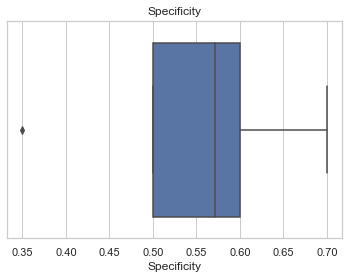

Specificity all:  [0.5, 0.6, 0.35, 0.5714285714285714, 0.7]
Specificity = 0.54 ± 0.12)
One Combined Confusion Matrix
conf_matrix: 
  [[33 19]
 [27 27]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.55      0.63      0.59        52
         1.0       0.59      0.50      0.54        54

    accuracy                           0.57       106
   macro avg       0.57      0.57      0.56       106
weighted avg       0.57      0.57      0.56       106

matthews_corrcoef
0.13578090752936633
balanced_accuracy_score
0.5673076923076923
Sensitivity
0.6346153846153846
Specificity
0.5
AUC-ROC for the combined results: 


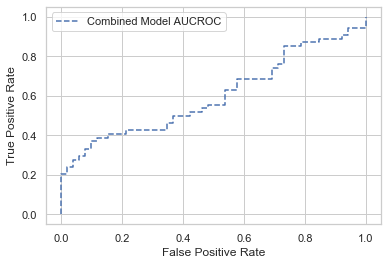

Combined Model AUC ROC:  0.6007834757834758
Start
0.0    58
1.0    48
Name: BSK_SAg_Proliferation_down, dtype: int64


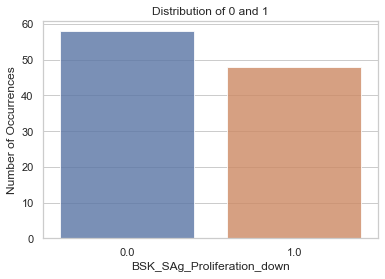

Total Compounds in Assay:  106
106
106
pca explained variance by first two components:  0.7210227204267772


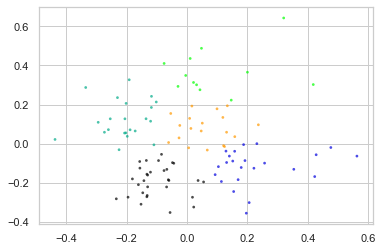

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


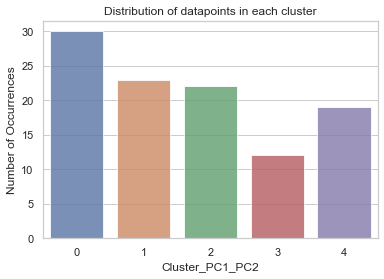

Total Selected CP features:  81
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[18  5]
 [ 3  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.86      0.78      0.82        23
         1.0       0.44      0.57      0.50         7

    accuracy                           0.73        30
   macro avg       0.65      0.68      0.66        30
weighted avg       0.76      0.73      0.74        30

Total Selected CP features:  129
Total Selected trai

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   35.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  6]
 [ 1  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.92      0.65      0.76        17
         1.0       0.45      0.83      0.59         6

    accuracy                           0.70        23
   macro avg       0.69      0.74      0.67        23
weighted avg       0.80      0.70      0.71        23

Total Selected CP features:  357
Total Selected train:  84

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 4  0]
 [16  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.20      1.00      0.33         4
         1.0       1.00      0.11      0.20        18

    accuracy                           0.27        22
   macro avg       0.60      0.56      0.27        22
weighted avg       0.85      0.27      0.22        22

Total Selected CP features:  183
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 4]
 [3 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      0.67      0.70        12
         1.0       0.50      0.57      0.53         7

    accuracy                           0.63        19
   macro avg       0.61      0.62      0.61        19
weighted avg       0.64      0.63      0.64        19

Total Selected CP features:  116
Total Selected train:  94
Tota

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[1 1]
 [5 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.17      0.50      0.25         2
         1.0       0.83      0.50      0.62        10

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.44        12
weighted avg       0.72      0.50      0.56        12



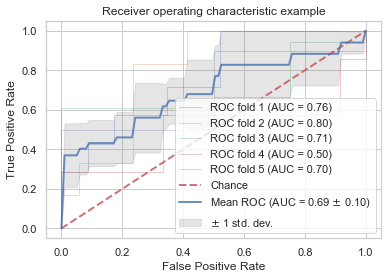

Mean of Each fold


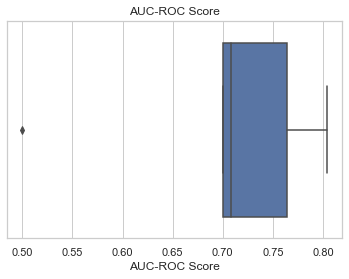

AUC-ROC all:  [0.7639751552795031, 0.803921568627451, 0.7083333333333334, 0.49999999999999994, 0.7]
AUC-ROC = 0.70 ± 0.10)


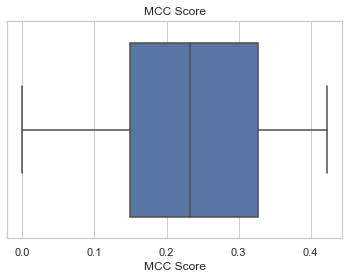

Matthews_corrcoef all:  [0.3267616012328021, 0.422288280162599, 0.14907119849998599, 0.2326210525996177, 0.0]
Matthews_corrcoef = 0.226 ± 0.145)


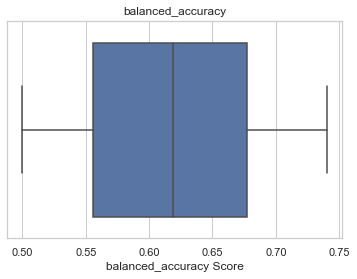

balanced_accuracy all:  [0.6770186335403727, 0.7401960784313726, 0.5555555555555556, 0.6190476190476191, 0.5]
balanced_accuracy = 0.62 ± 0.09)


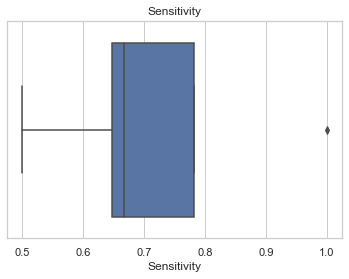

Sensitivity all:  [0.782608695652174, 0.6470588235294118, 1.0, 0.6666666666666666, 0.5]
Sensitivity = 0.72 ± 0.17)


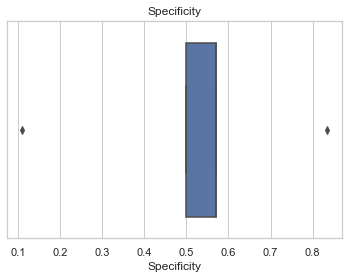

Specificity all:  [0.5714285714285714, 0.8333333333333334, 0.1111111111111111, 0.5714285714285714, 0.5]
Specificity = 0.52 ± 0.23)
One Combined Confusion Matrix
conf_matrix: 
  [[42 16]
 [28 20]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      0.72      0.66        58
         1.0       0.56      0.42      0.48        48

    accuracy                           0.58       106
   macro avg       0.58      0.57      0.57       106
weighted avg       0.58      0.58      0.57       106

matthews_corrcoef
0.14799641015976975
balanced_accuracy_score
0.5704022988505747
Sensitivity
0.7241379310344828
Specificity
0.4166666666666667
AUC-ROC for the combined results: 


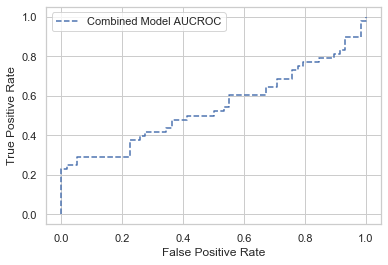

Combined Model AUC ROC:  0.5427442528735632
Start
0.0    61
1.0    45
Name: BSK_3C_SRB_down, dtype: int64


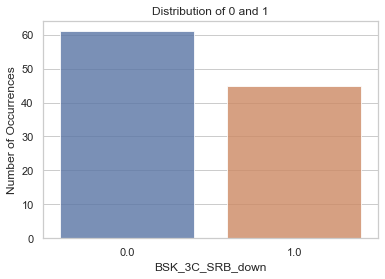

Total Compounds in Assay:  106
106
106
pca explained variance by first two components:  0.7210227204267772


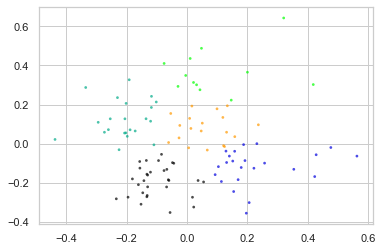

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


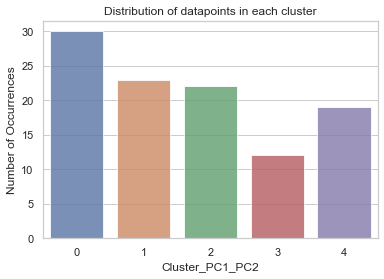

Total Selected CP features:  30
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[16  6]
 [ 4  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.80      0.73      0.76        22
         1.0       0.40      0.50      0.44         8

    accuracy                           0.67        30
   macro avg       0.60      0.61      0.60        30
weighted avg       0.69      0.67      0.68        30

Total Selected CP features:  18
Total Selected train:  83


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  7]
 [ 1  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.92      0.63      0.75        19
         1.0       0.30      0.75      0.43         4

    accuracy                           0.65        23
   macro avg       0.61      0.69      0.59        23
weighted avg       0.81      0.65      0.69        23

Total Selected CP features:  125
Total Selected train:  84


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 3  0]
 [17  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.15      1.00      0.26         3
         1.0       1.00      0.11      0.19        19

    accuracy                           0.23        22
   macro avg       0.57      0.55      0.23        22
weighted avg       0.88      0.23      0.20        22

Total Selected CP features:  25
Total Selected train:  87
T

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 5]
 [4 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.64      0.58      0.61        12
         1.0       0.38      0.43      0.40         7

    accuracy                           0.53        19
   macro avg       0.51      0.51      0.50        19
weighted avg       0.54      0.53      0.53        19

Total Selected CP features:  22
Total Selected train:  9

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[4 1]
 [3 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.80      0.67         5
         1.0       0.80      0.57      0.67         7

    accuracy                           0.67        12
   macro avg       0.69      0.69      0.67        12
weighted avg       0.70      0.67      0.67        12



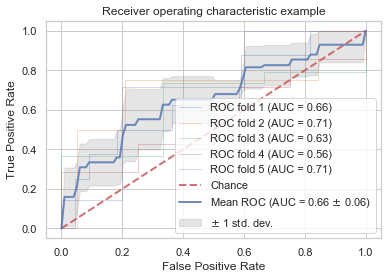

Mean of Each fold


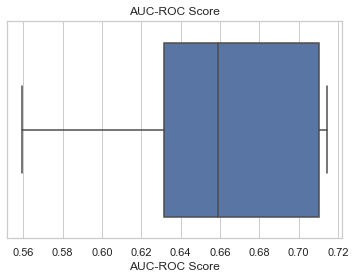

AUC-ROC all:  [0.6590909090909091, 0.7105263157894737, 0.631578947368421, 0.5595238095238095, 0.7142857142857143]
AUC-ROC = 0.66 ± 0.06)


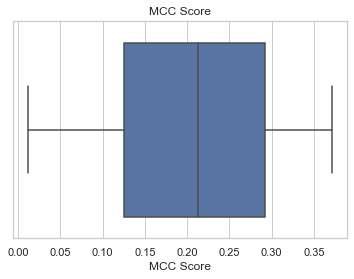

Matthews_corrcoef all:  [0.21320071635561041, 0.29175581826225594, 0.12565617248750865, 0.011631052629980886, 0.37142857142857144]
Matthews_corrcoef = 0.203 ± 0.126)


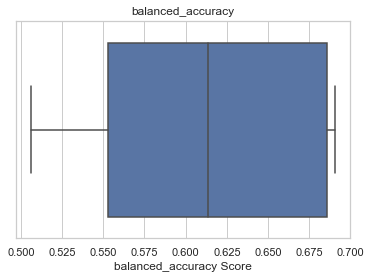

balanced_accuracy all:  [0.6136363636363636, 0.6907894736842105, 0.5526315789473684, 0.5059523809523809, 0.6857142857142857]
balanced_accuracy = 0.61 ± 0.07)


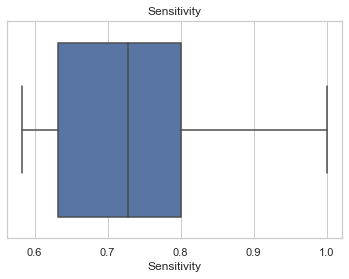

Sensitivity all:  [0.7272727272727273, 0.631578947368421, 1.0, 0.5833333333333334, 0.8]
Sensitivity = 0.75 ± 0.15)


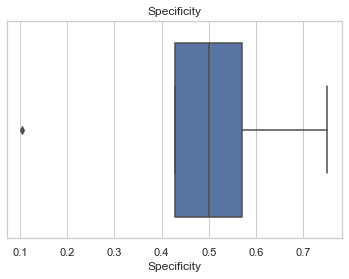

Specificity all:  [0.5, 0.75, 0.10526315789473684, 0.42857142857142855, 0.5714285714285714]
Specificity = 0.47 ± 0.21)
One Combined Confusion Matrix
conf_matrix: 
  [[42 19]
 [29 16]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.59      0.69      0.64        61
         1.0       0.46      0.36      0.40        45

    accuracy                           0.55       106
   macro avg       0.52      0.52      0.52       106
weighted avg       0.53      0.55      0.54       106

matthews_corrcoef
0.046328794458730636
balanced_accuracy_score
0.522040072859745
Sensitivity
0.6885245901639344
Specificity
0.35555555555555557
AUC-ROC for the combined results: 


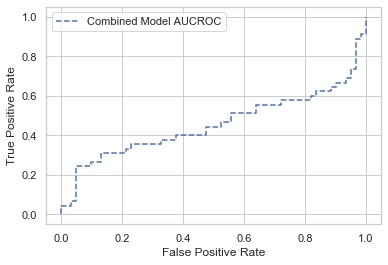

Combined Model AUC ROC:  0.454280510018215
Start
0.0    65
1.0    41
Name: BSK_3C_Vis_down, dtype: int64


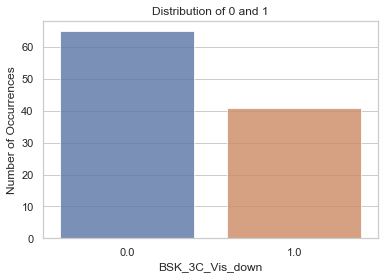

Total Compounds in Assay:  106
106
106
pca explained variance by first two components:  0.7210227204267772


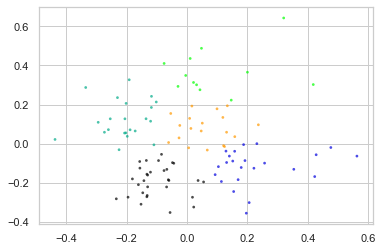

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


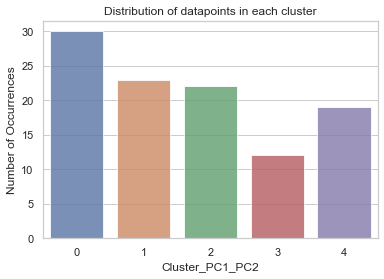

Total Selected CP features:  87
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   35.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[20  3]
 [ 3  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.87      0.87      0.87        23
         1.0       0.57      0.57      0.57         7

    accuracy                           0.80        30
   macro avg       0.72      0.72      0.72        30
weighted avg       0.80      0.80      0.80        30

Total Selected CP features:  142
Total Selected train: 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[15  4]
 [ 1  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.94      0.79      0.86        19
         1.0       0.43      0.75      0.55         4

    accuracy                           0.78        23
   macro avg       0.68      0.77      0.70        23
weighted avg       0.85      0.78      0.80        23

Total Selected CP features:  430
Total Selected train: 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   40.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.7min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 3  1]
 [13  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.19      0.75      0.30         4
         1.0       0.83      0.28      0.42        18

    accuracy                           0.36        22
   macro avg       0.51      0.51      0.36        22
weighted avg       0.72      0.36      0.40        22

Total Selected CP features:  119
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  2]
 [ 3  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.80      0.86      0.83        14
         1.0       0.50      0.40      0.44         5

    accuracy                           0.74        19
   macro avg       0.65      0.63      0.64        19
weighted avg       0.72      0.74      0.73        19

Total Selected CP features:  125
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[4 1]
 [2 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.80      0.73         5
         1.0       0.83      0.71      0.77         7

    accuracy                           0.75        12
   macro avg       0.75      0.76      0.75        12
weighted avg       0.76      0.75      0.75        12



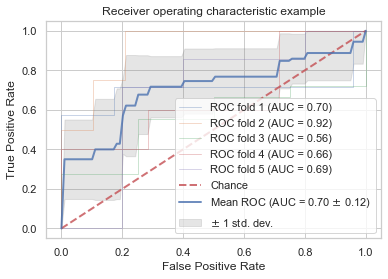

Mean of Each fold


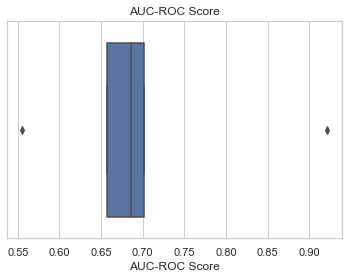

AUC-ROC all:  [0.7018633540372671, 0.9210526315789473, 0.5555555555555556, 0.6571428571428571, 0.6857142857142857]
AUC-ROC = 0.70 ± 0.12)


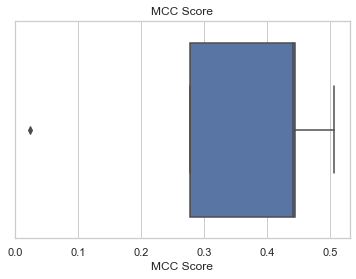

Matthews_corrcoef all:  [0.4409937888198758, 0.4443938593811115, 0.024056261216234408, 0.27774602993176545, 0.50709255283711]
Matthews_corrcoef = 0.339 ± 0.175)


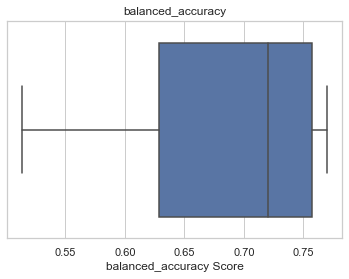

balanced_accuracy all:  [0.7204968944099379, 0.7697368421052632, 0.5138888888888888, 0.6285714285714286, 0.7571428571428571]
balanced_accuracy = 0.68 ± 0.10)


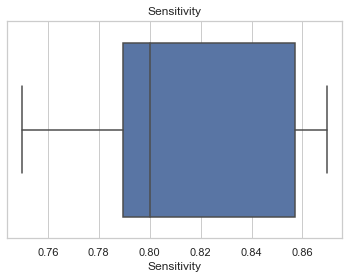

Sensitivity all:  [0.8695652173913043, 0.7894736842105263, 0.75, 0.8571428571428571, 0.8]
Sensitivity = 0.81 ± 0.04)


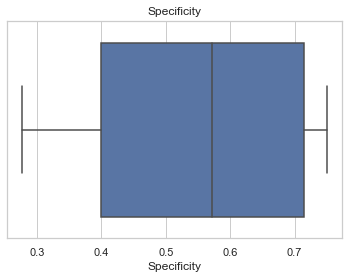

Specificity all:  [0.5714285714285714, 0.75, 0.2777777777777778, 0.4, 0.7142857142857143]
Specificity = 0.54 ± 0.18)
One Combined Confusion Matrix
conf_matrix: 
  [[54 11]
 [22 19]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.83      0.77        65
         1.0       0.63      0.46      0.54        41

    accuracy                           0.69       106
   macro avg       0.67      0.65      0.65       106
weighted avg       0.68      0.69      0.68       106

matthews_corrcoef
0.3180533926362993
balanced_accuracy_score
0.6470919324577862
Sensitivity
0.8307692307692308
Specificity
0.4634146341463415
AUC-ROC for the combined results: 


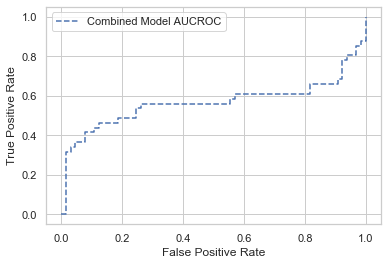

Combined Model AUC ROC:  0.5654784240150095
Start
0.0    55
1.0    33
Name: APR_HepG2_CellLoss_24h_dn, dtype: int64


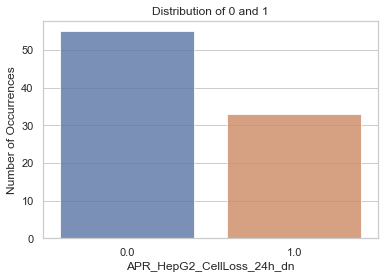

Total Compounds in Assay:  88
88
88
pca explained variance by first two components:  0.7196696700655922


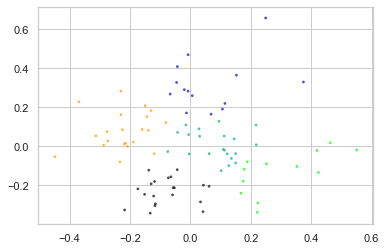

Start
4    21
2    21
0    20
1    14
3    12
Name: Cluster_PC1_PC2, dtype: int64


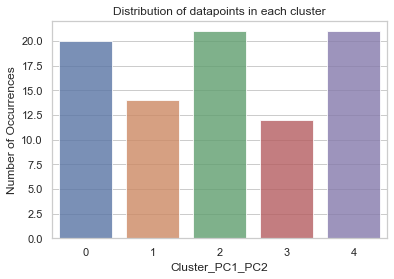

Total Selected CP features:  567
Total Selected train:  67
Total Selected test:  21
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 5  0]
 [14  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.26      1.00      0.42         5
         1.0       1.00      0.12      0.22        16

    accuracy                           0.33        21
   macro avg       0.63      0.56      0.32        21
weighted avg       0.82      0.33      0.27        21

Total Selected CP features:  224
Total Selected train:  67


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[15  1]
 [ 4  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.79      0.94      0.86        16
         1.0       0.50      0.20      0.29         5

    accuracy                           0.76        21
   macro avg       0.64      0.57      0.57        21
weighted avg       0.72      0.76      0.72        21

Total Selected CP features:  97
Total Selected train:  68
T

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  4]
 [ 0  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      0.78      0.88        18
         1.0       0.33      1.00      0.50         2

    accuracy                           0.80        20
   macro avg       0.67      0.89      0.69        20
weighted avg       0.93      0.80      0.84        20

Total Selected CP features:  47
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 0]
 [1 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.93         7
         1.0       1.00      0.86      0.92         7

    accuracy                           0.93        14
   macro avg       0.94      0.93      0.93        14
weighted avg       0.94      0.93      0.93        14

Total Selected CP features:  229
Total Selected train:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   14.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 2]
 [2 1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.78      0.78      0.78         9
         1.0       0.33      0.33      0.33         3

    accuracy                           0.67        12
   macro avg       0.56      0.56      0.56        12
weighted avg       0.67      0.67      0.67        12



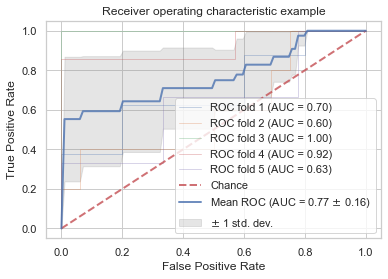

Mean of Each fold


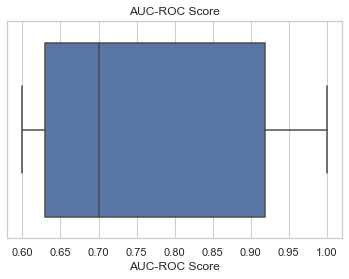

AUC-ROC all:  [0.7, 0.6, 1.0, 0.9183673469387754, 0.6296296296296295]
AUC-ROC = 0.77 ± 0.16)


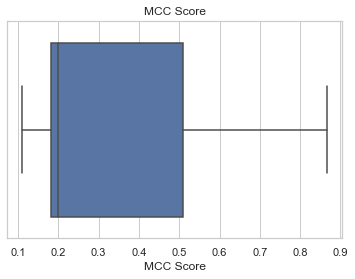

Matthews_corrcoef all:  [0.18136906252750293, 0.1995059687802532, 0.5091750772173156, 0.8660254037844387, 0.1111111111111111]
Matthews_corrcoef = 0.373 ± 0.282)


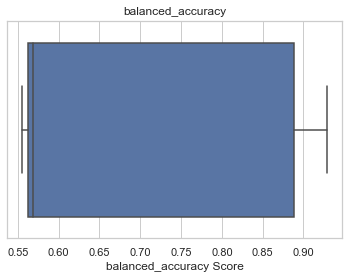

balanced_accuracy all:  [0.5625, 0.56875, 0.8888888888888888, 0.9285714285714286, 0.5555555555555556]
balanced_accuracy = 0.70 ± 0.17)


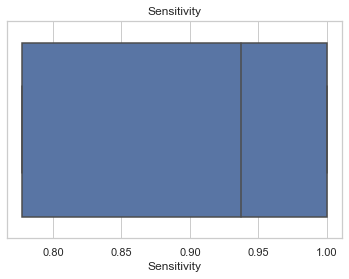

Sensitivity all:  [1.0, 0.9375, 0.7777777777777778, 1.0, 0.7777777777777778]
Sensitivity = 0.90 ± 0.10)


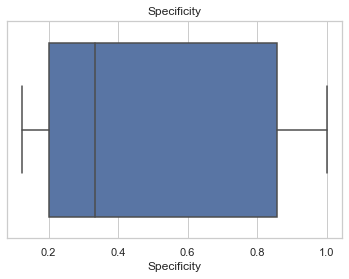

Specificity all:  [0.125, 0.2, 1.0, 0.8571428571428571, 0.3333333333333333]
Specificity = 0.50 ± 0.36)
One Combined Confusion Matrix
conf_matrix: 
  [[48  7]
 [21 12]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.70      0.87      0.77        55
         1.0       0.63      0.36      0.46        33

    accuracy                           0.68        88
   macro avg       0.66      0.62      0.62        88
weighted avg       0.67      0.68      0.66        88

matthews_corrcoef
0.27811065739636276
balanced_accuracy_score
0.6181818181818182
Sensitivity
0.8727272727272727
Specificity
0.36363636363636365
AUC-ROC for the combined results: 


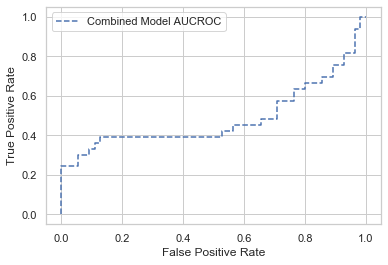

Combined Model AUC ROC:  0.4865013774104683
Start
0.0    67
1.0    39
Name: BSK_LPS_SRB_down, dtype: int64


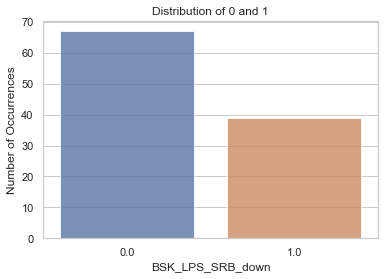

Total Compounds in Assay:  106
106
106
pca explained variance by first two components:  0.7210227204267772


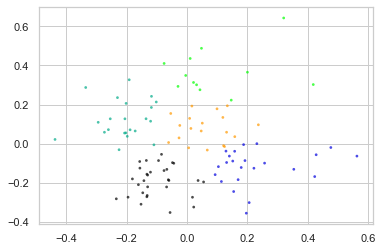

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


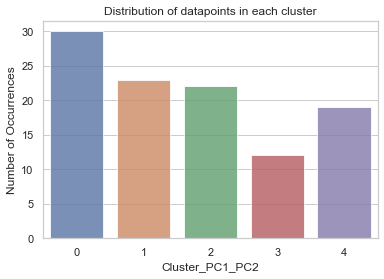

Total Selected CP features:  101
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[17  8]
 [ 3  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.85      0.68      0.76        25
         1.0       0.20      0.40      0.27         5

    accuracy                           0.63        30
   macro avg       0.53      0.54      0.51        30
weighted avg       0.74      0.63      0.67        30

Total Selected CP features:  92
Total Selected train

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  8]
 [ 2  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.83      0.56      0.67        18
         1.0       0.27      0.60      0.37         5

    accuracy                           0.57        23
   macro avg       0.55      0.58      0.52        23
weighted avg       0.71      0.57      0.60        23

Total Selected CP features:  244
Total Selected trai

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 6  0]
 [14  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.30      1.00      0.46         6
         1.0       1.00      0.12      0.22        16

    accuracy                           0.36        22
   macro avg       0.65      0.56      0.34        22
weighted avg       0.81      0.36      0.29        22

Total Selected CP features:  80
Total Selected train:  87


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  0]
 [ 4  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.76      1.00      0.87        13
         1.0       1.00      0.33      0.50         6

    accuracy                           0.79        19
   macro avg       0.88      0.67      0.68        19
weighted avg       0.84      0.79      0.75        19

Total Selected CP features:  113
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[4 1]
 [4 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      0.80      0.62         5
         1.0       0.75      0.43      0.55         7

    accuracy                           0.58        12
   macro avg       0.62      0.61      0.58        12
weighted avg       0.65      0.58      0.57        12



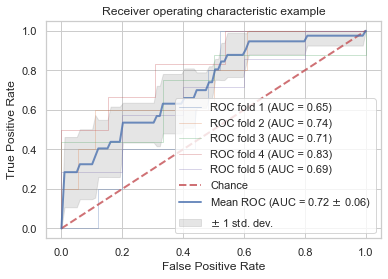

Mean of Each fold


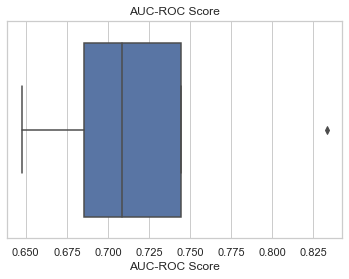

AUC-ROC all:  [0.648, 0.7444444444444445, 0.7083333333333333, 0.8333333333333333, 0.6857142857142857]
AUC-ROC = 0.72 ± 0.06)


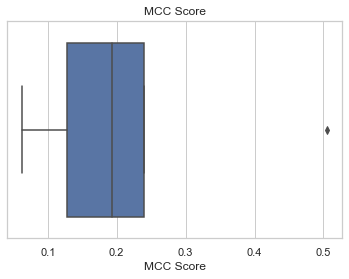

Matthews_corrcoef all:  [0.06324555320336758, 0.1284457725980754, 0.19364916731037085, 0.5048781642974013, 0.23904572186687872]
Matthews_corrcoef = 0.226 ± 0.152)


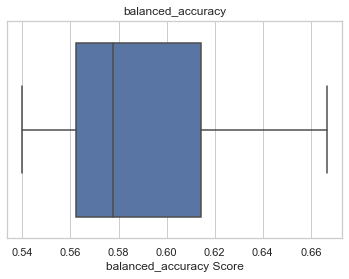

balanced_accuracy all:  [0.54, 0.5777777777777777, 0.5625, 0.6666666666666666, 0.6142857142857143]
balanced_accuracy = 0.59 ± 0.04)


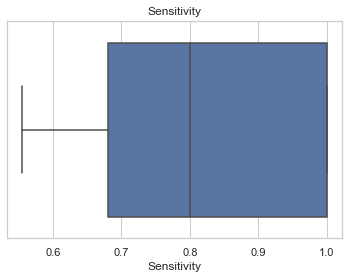

Sensitivity all:  [0.68, 0.5555555555555556, 1.0, 1.0, 0.8]
Sensitivity = 0.81 ± 0.18)


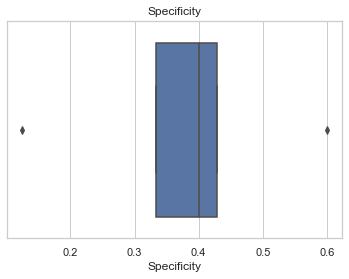

Specificity all:  [0.4, 0.6, 0.125, 0.3333333333333333, 0.42857142857142855]
Specificity = 0.38 ± 0.15)
One Combined Confusion Matrix
conf_matrix: 
  [[50 17]
 [27 12]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.65      0.75      0.69        67
         1.0       0.41      0.31      0.35        39

    accuracy                           0.58       106
   macro avg       0.53      0.53      0.52       106
weighted avg       0.56      0.58      0.57       106

matthews_corrcoef
0.05837206350144023
balanced_accuracy_score
0.5269804822043629
Sensitivity
0.746268656716418
Specificity
0.3076923076923077
AUC-ROC for the combined results: 


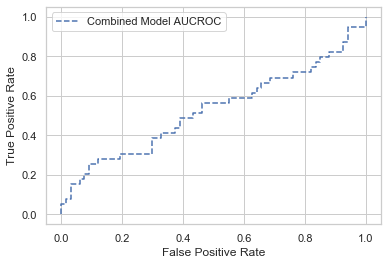

Combined Model AUC ROC:  0.5269804822043628
Start
0.0    70
1.0    36
Name: BSK_CASM3C_Proliferation_down, dtype: int64


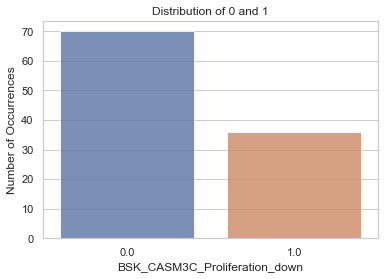

Total Compounds in Assay:  106
106
106
pca explained variance by first two components:  0.7210227204267772


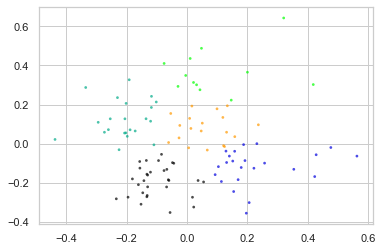

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


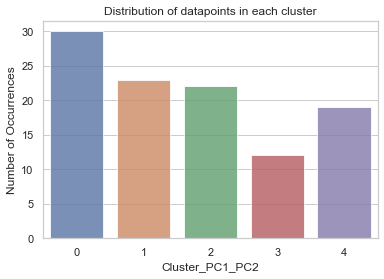

Total Selected CP features:  221
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[19  7]
 [ 2  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.90      0.73      0.81        26
         1.0       0.22      0.50      0.31         4

    accuracy                           0.70        30
   macro avg       0.56      0.62      0.56        30
weighted avg       0.81      0.70      0.74        30

Total Selected CP features:  125
Total Selected train

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[18  1]
 [ 1  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        19
         1.0       0.75      0.75      0.75         4

    accuracy                           0.91        23
   macro avg       0.85      0.85      0.85        23
weighted avg       0.91      0.91      0.91        23

Total Selected CP features:  359
Total Selected train:  84


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 8  0]
 [12  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.40      1.00      0.57         8
         1.0       1.00      0.14      0.25        14

    accuracy                           0.45        22
   macro avg       0.70      0.57      0.41        22
weighted avg       0.78      0.45      0.37        22

Total Selected CP features:  149
Total Selected train:  87


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  0]
 [ 3  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.81      1.00      0.90        13
         1.0       1.00      0.50      0.67         6

    accuracy                           0.84        19
   macro avg       0.91      0.75      0.78        19
weighted avg       0.87      0.84      0.82        19

Total Selected CP features:  79
Total Selected train:  94
T

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   14.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[4 0]
 [5 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.44      1.00      0.62         4
         1.0       1.00      0.38      0.55         8

    accuracy                           0.58        12
   macro avg       0.72      0.69      0.58        12
weighted avg       0.81      0.58      0.57        12



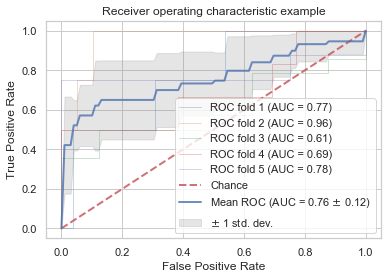

Mean of Each fold


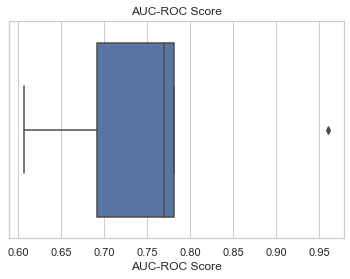

AUC-ROC all:  [0.7692307692307693, 0.9605263157894737, 0.6071428571428571, 0.6923076923076923, 0.78125]
AUC-ROC = 0.76 ± 0.12)


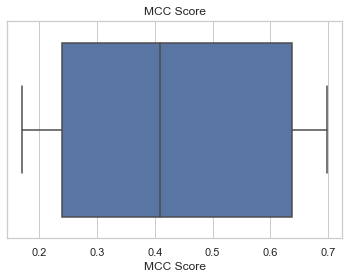

Matthews_corrcoef all:  [0.17118419700436516, 0.6973684210526315, 0.23904572186687872, 0.6373774391990981, 0.408248290463863]
Matthews_corrcoef = 0.431 ± 0.209)


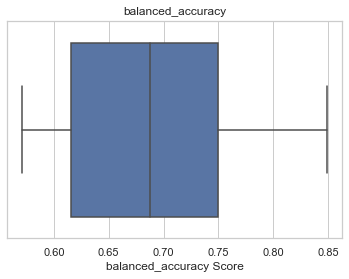

balanced_accuracy all:  [0.6153846153846154, 0.8486842105263157, 0.5714285714285714, 0.75, 0.6875]
balanced_accuracy = 0.69 ± 0.10)


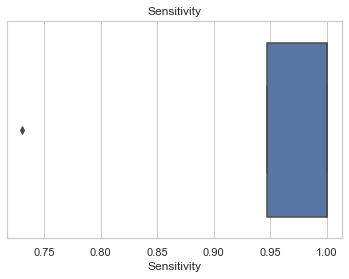

Sensitivity all:  [0.7307692307692307, 0.9473684210526315, 1.0, 1.0, 1.0]
Sensitivity = 0.94 ± 0.10)


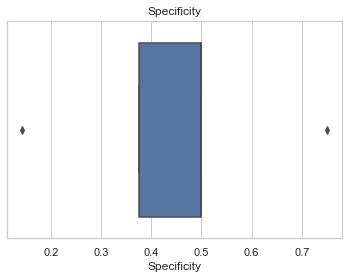

Specificity all:  [0.5, 0.75, 0.14285714285714285, 0.5, 0.375]
Specificity = 0.45 ± 0.20)
One Combined Confusion Matrix
conf_matrix: 
  [[62  8]
 [23 13]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      0.89      0.80        70
         1.0       0.62      0.36      0.46        36

    accuracy                           0.71       106
   macro avg       0.67      0.62      0.63       106
weighted avg       0.69      0.71      0.68       106

matthews_corrcoef
0.29327227225309116
balanced_accuracy_score
0.6234126984126984
Sensitivity
0.8857142857142857
Specificity
0.3611111111111111
AUC-ROC for the combined results: 


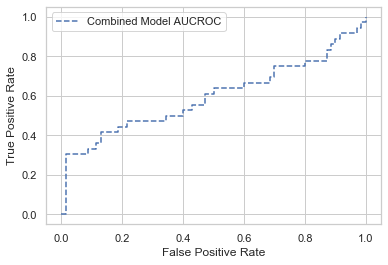

Combined Model AUC ROC:  0.5968253968253968
Start
0.0    70
1.0    36
Name: BSK_SAg_SRB_down, dtype: int64


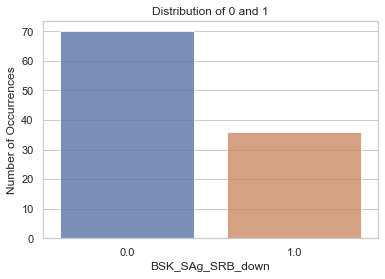

Total Compounds in Assay:  106
106
106
pca explained variance by first two components:  0.7210227204267772


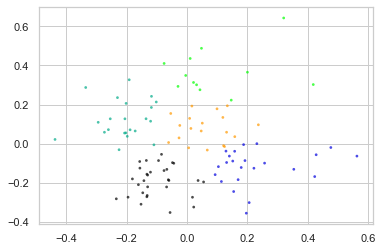

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


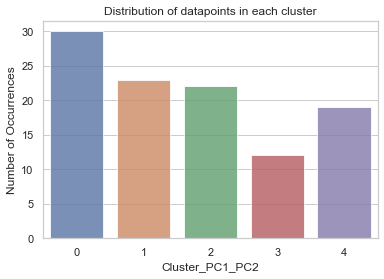

Total Selected CP features:  105
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[21  5]
 [ 3  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.88      0.81      0.84        26
         1.0       0.17      0.25      0.20         4

    accuracy                           0.73        30
   macro avg       0.52      0.53      0.52        30
weighted avg       0.78      0.73      0.75        30

Total Selected CP features:  92
Total Selected train:  83
T

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[15  4]
 [ 2  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.88      0.79      0.83        19
         1.0       0.33      0.50      0.40         4

    accuracy                           0.74        23
   macro avg       0.61      0.64      0.62        23
weighted avg       0.79      0.74      0.76        23

Total Selected CP features:  262
Total Selected train:  84


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.6min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 6  0]
 [15  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.29      1.00      0.44         6
         1.0       1.00      0.06      0.12        16

    accuracy                           0.32        22
   macro avg       0.64      0.53      0.28        22
weighted avg       0.81      0.32      0.21        22

Total Selected CP features:  80
Total Selected train:  87


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  1]
 [ 3  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.81      0.93      0.87        14
         1.0       0.67      0.40      0.50         5

    accuracy                           0.79        19
   macro avg       0.74      0.66      0.68        19
weighted avg       0.77      0.79      0.77        19

Total Selected CP features:  68
Total Selected train:  94
T

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[3 2]
 [3 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      0.60      0.55         5
         1.0       0.67      0.57      0.62         7

    accuracy                           0.58        12
   macro avg       0.58      0.59      0.58        12
weighted avg       0.60      0.58      0.59        12



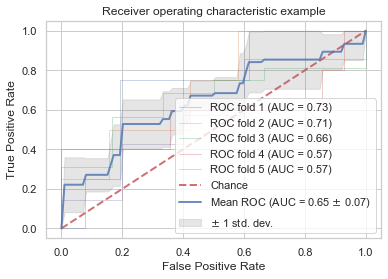

Mean of Each fold


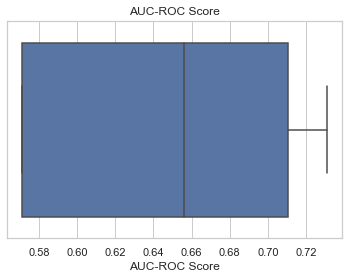

AUC-ROC all:  [0.7307692307692307, 0.7105263157894737, 0.65625, 0.5714285714285714, 0.5714285714285714]
AUC-ROC = 0.65 ± 0.07)


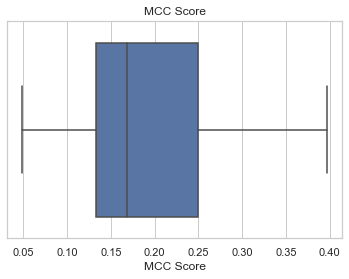

Matthews_corrcoef all:  [0.049029033784546004, 0.24987096773334005, 0.1336306209562122, 0.3967876966218537, 0.1690308509457033]
Matthews_corrcoef = 0.200 ± 0.118)


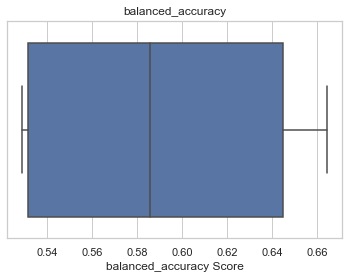

balanced_accuracy all:  [0.5288461538461539, 0.6447368421052632, 0.53125, 0.6642857142857144, 0.5857142857142856]
balanced_accuracy = 0.59 ± 0.06)


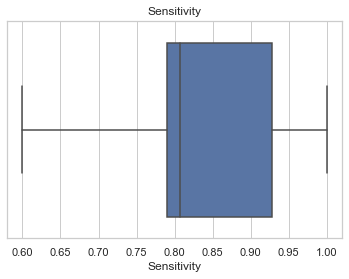

Sensitivity all:  [0.8076923076923077, 0.7894736842105263, 1.0, 0.9285714285714286, 0.6]
Sensitivity = 0.83 ± 0.14)


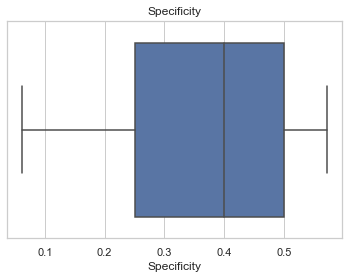

Specificity all:  [0.25, 0.5, 0.0625, 0.4, 0.5714285714285714]
Specificity = 0.36 ± 0.18)
One Combined Confusion Matrix
conf_matrix: 
  [[58 12]
 [26 10]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      0.83      0.75        70
         1.0       0.45      0.28      0.34        36

    accuracy                           0.64       106
   macro avg       0.57      0.55      0.55       106
weighted avg       0.61      0.64      0.61       106

matthews_corrcoef
0.12418911728290961
balanced_accuracy_score
0.5531746031746032
Sensitivity
0.8285714285714286
Specificity
0.2777777777777778
AUC-ROC for the combined results: 


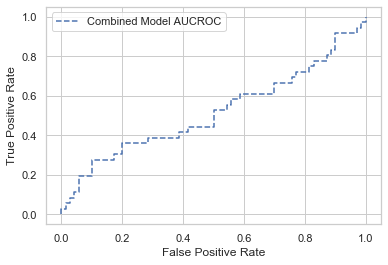

Combined Model AUC ROC:  0.517063492063492
Start
0.0    72
1.0    34
Name: BSK_4H_SRB_down, dtype: int64


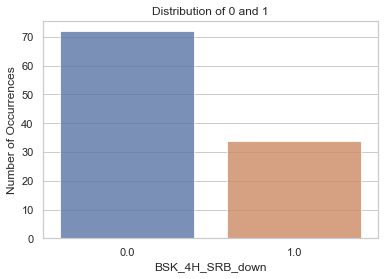

Total Compounds in Assay:  106
106
106
pca explained variance by first two components:  0.7210227204267772


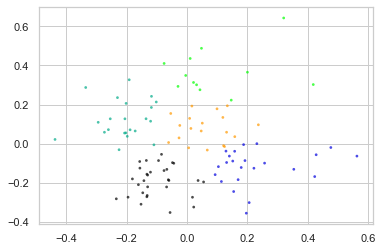

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


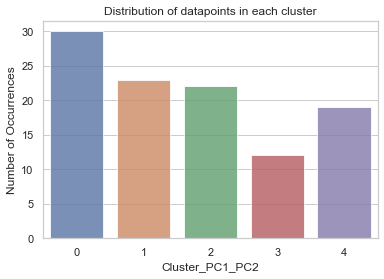

Total Selected CP features:  173
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.3min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[23  2]
 [ 2  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        25
         1.0       0.60      0.60      0.60         5

    accuracy                           0.87        30
   macro avg       0.76      0.76      0.76        30
weighted avg       0.87      0.87      0.87        30

Total Selected CP features:  225
Total Selected train:  83

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.5min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[16  3]
 [ 1  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.94      0.84      0.89        19
         1.0       0.50      0.75      0.60         4

    accuracy                           0.83        23
   macro avg       0.72      0.80      0.74        23
weighted avg       0.86      0.83      0.84        23

Total Selected CP features:  465
Total Selected train:  84

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   32.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 8  0]
 [12  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.40      1.00      0.57         8
         1.0       1.00      0.14      0.25        14

    accuracy                           0.45        22
   macro avg       0.70      0.57      0.41        22
weighted avg       0.78      0.45      0.37        22

Total Selected CP features:  251
Total Selected trai

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   29.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   52.6s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  4.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  5.4min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  0]
 [ 4  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.76      1.00      0.87        13
         1.0       1.00      0.33      0.50         6

    accuracy                           0.79        19
   macro avg       0.88      0.67      0.68        19
weighted avg       0.84      0.79      0.75        19

Total Selected CP features:  181
Total Selected train:  94

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    8.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   24.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   42.1s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  4.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  5.1min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 1]
 [1 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86         7
         1.0       0.80      0.80      0.80         5

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



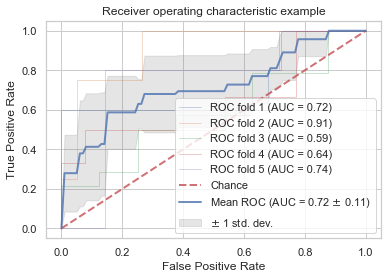

Mean of Each fold


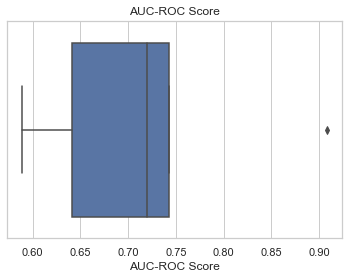

AUC-ROC all:  [0.72, 0.9078947368421053, 0.5892857142857143, 0.641025641025641, 0.7428571428571429]
AUC-ROC = 0.72 ± 0.11)


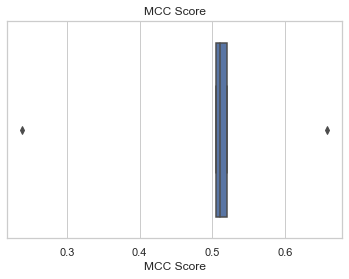

Matthews_corrcoef all:  [0.52, 0.5110997067272864, 0.23904572186687872, 0.5048781642974013, 0.6571428571428571]
Matthews_corrcoef = 0.486 ± 0.136)


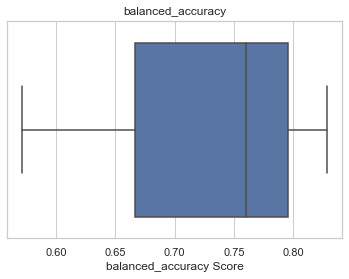

balanced_accuracy all:  [0.76, 0.7960526315789473, 0.5714285714285714, 0.6666666666666666, 0.8285714285714285]
balanced_accuracy = 0.72 ± 0.09)


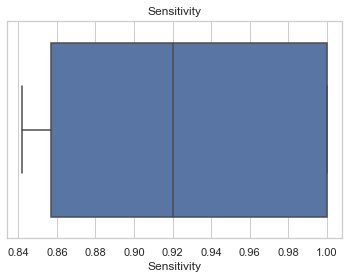

Sensitivity all:  [0.92, 0.8421052631578947, 1.0, 1.0, 0.8571428571428571]
Sensitivity = 0.92 ± 0.07)


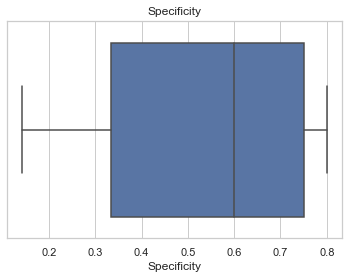

Specificity all:  [0.6, 0.75, 0.14285714285714285, 0.3333333333333333, 0.8]
Specificity = 0.53 ± 0.25)
One Combined Confusion Matrix
conf_matrix: 
  [[66  6]
 [20 14]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.77      0.92      0.84        72
         1.0       0.70      0.41      0.52        34

    accuracy                           0.75       106
   macro avg       0.73      0.66      0.68       106
weighted avg       0.75      0.75      0.73       106

matthews_corrcoef
0.3918195653861934
balanced_accuracy_score
0.6642156862745098
Sensitivity
0.9166666666666666
Specificity
0.4117647058823529
AUC-ROC for the combined results: 


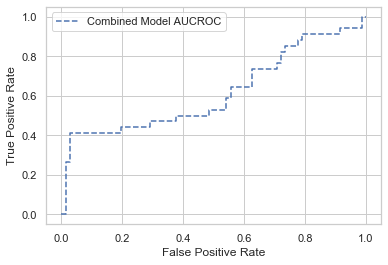

Combined Model AUC ROC:  0.616830065359477
Start
0.0    90
1.0    34
Name: ACEA_T47D_80hr_Negative, dtype: int64


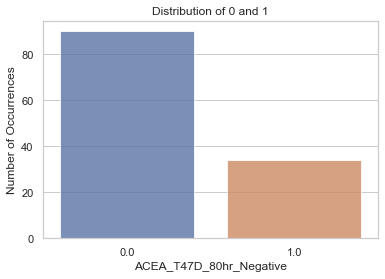

Total Compounds in Assay:  124
124
124
pca explained variance by first two components:  0.7273896354684481


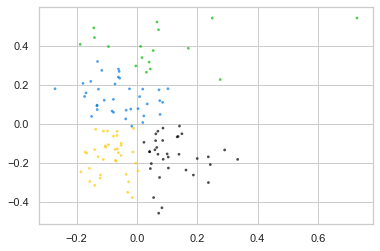

Start
1    37
3    36
0    34
2    17
Name: Cluster_PC1_PC2, dtype: int64


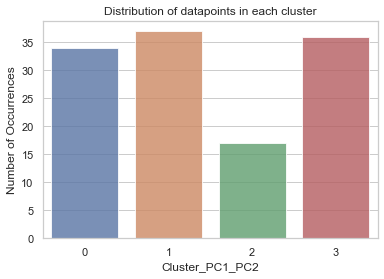

Total Selected CP features:  271
Total Selected train:  87
Total Selected test:  37
Fitting 4 folds for each of 768 candidates, totalling 3072 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    6.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   22.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   44.3s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 3072 out of 3072 | elapsed:  4.1min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[19  1]
 [14  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.58      0.95      0.72        20
         1.0       0.75      0.18      0.29        17

    accuracy                           0.59        37
   macro avg       0.66      0.56      0.50        37
weighted avg       0.66      0.59      0.52        37

Total Selected CP features:  245
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    8.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   24.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   44.8s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 3072 out of 3072 | elapsed:  4.1min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[28  1]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.82      0.97      0.89        29
         1.0       0.50      0.14      0.22         7

    accuracy                           0.81        36
   macro avg       0.66      0.55      0.56        36
weighted avg       0.76      0.81      0.76        36

Total Selected CP features:  215
Total Selected train:  90


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    8.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   25.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   49.2s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 3072 out of 3072 | elapsed:  4.1min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[25  7]
 [ 1  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.96      0.78      0.86        32
         1.0       0.12      0.50      0.20         2

    accuracy                           0.76        34
   macro avg       0.54      0.64      0.53        34
weighted avg       0.91      0.76      0.82        34

Total Selected CP features:  66
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    7.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   24.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   47.3s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 3072 out of 3072 | elapsed:  3.5min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 0]
 [4 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      1.00      0.82         9
         1.0       1.00      0.50      0.67         8

    accuracy                           0.76        17
   macro avg       0.85      0.75      0.74        17
weighted avg       0.84      0.76      0.75        17



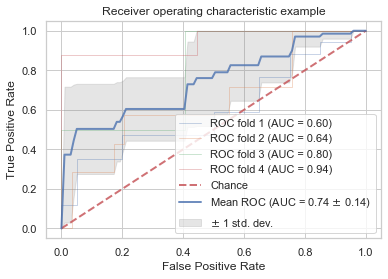

Mean of Each fold


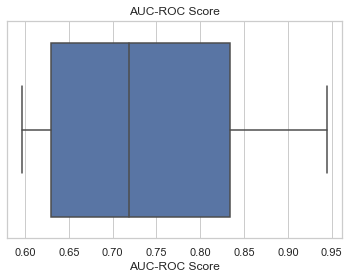

AUC-ROC all:  [0.5970588235294119, 0.6403940886699507, 0.796875, 0.9444444444444444]
AUC-ROC = 0.74 ± 0.14)


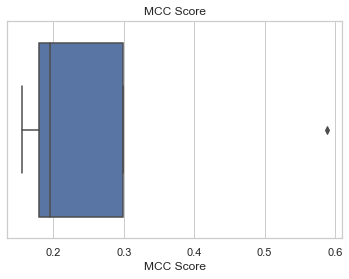

Matthews_corrcoef all:  [0.20297475761326578, 0.18724930115325378, 0.1560094301883457, 0.588348405414552]
Matthews_corrcoef = 0.284 ± 0.177)


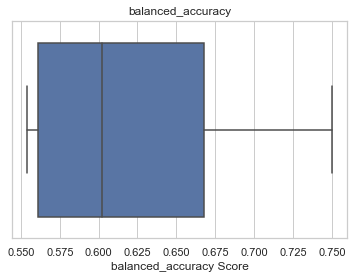

balanced_accuracy all:  [0.5632352941176471, 0.5541871921182266, 0.640625, 0.75]
balanced_accuracy = 0.63 ± 0.08)


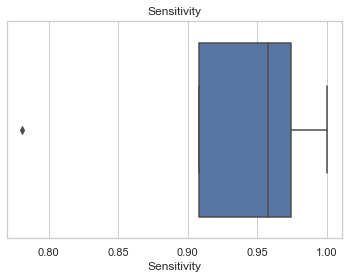

Sensitivity all:  [0.95, 0.9655172413793104, 0.78125, 1.0]
Sensitivity = 0.92 ± 0.08)


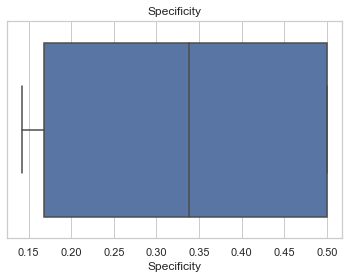

Specificity all:  [0.17647058823529413, 0.14285714285714285, 0.5, 0.5]
Specificity = 0.33 ± 0.17)
One Combined Confusion Matrix
conf_matrix: 
  [[81  9]
 [25  9]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.76      0.90      0.83        90
         1.0       0.50      0.26      0.35        34

    accuracy                           0.73       124
   macro avg       0.63      0.58      0.59       124
weighted avg       0.69      0.73      0.69       124

matthews_corrcoef
0.20858383016532536
balanced_accuracy_score
0.5823529411764706
Sensitivity
0.9
Specificity
0.2647058823529412
AUC-ROC for the combined results: 


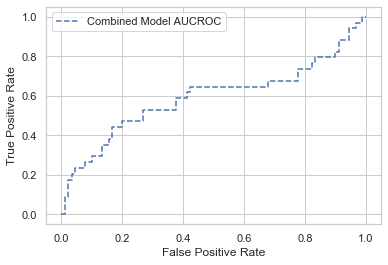

Combined Model AUC ROC:  0.5915032679738563


In [49]:
list_of_lists = []

for col in tox_list:
    
    method = "Morgan+CP_KS_0.02"
    print("Start")
    toxcast_counts=our_data[col].value_counts()
    print(our_data[col].value_counts())
    pyplot.figure()
    sns.barplot(toxcast_counts.index, toxcast_counts.values, alpha=0.8)
    pyplot.title('Distribution of 0 and 1')
    pyplot.ylabel('Number of Occurrences', fontsize=12)
    pyplot.xlabel(col, fontsize=12)
    pyplot.show()
    
    if col=='ACEA_T47D_80hr_Negative':
        n_cluster=4
    else:
        n_cluster=5  
        
    
    target=col

    df_temp=pd.merge(cp, toxcast[[target, 'smiles_r']], left_on = 'smiles_r', right_on = 'smiles_r', how = 'inner')
    df_temp['MorganFingerprint'] =df_temp['smiles_r'].apply(MorganFingerprint)
    df_temp=df_temp.dropna(subset=[target])
    df_temp=df_temp.drop('Unnamed: 0', axis = 1)
    
    
    X_morgan = np.array([x for x in df_temp['MorganFingerprint']])
    
    
    data=df_temp 
    data=data.drop('MorganFingerprint', axis = 1)
    data=data.drop('smiles_r', axis = 1)
    

    
    X_CP, y = data.loc[:, data.columns != target], data[target]

    X_CP=X_CP.to_numpy()
    
    y=y.to_numpy()
        
    print("Total Compounds in Assay: ", len(y))
    X= np.concatenate((X_CP, X_morgan ), axis=1)
    
    print(len(X))
    print(len(y))
    
    
    #PCA to groups
    
    df_temp['MolWt']=df_temp['smiles_r'].apply(GetExactMolWt)
    df_temp['TPSA']=df_temp['smiles_r'].apply(GetCalcTPSA) #Topological Polar Surface Area
    df_temp['nRotB']=df_temp['smiles_r'].apply(GetNumRotatableBonds) #Number of rotable bonds
    df_temp['HBD']=df_temp['smiles_r'].apply(GetNumHDonors) #Number of H bond donors
    df_temp['HBA']=df_temp['smiles_r'].apply(GetNumHAcceptors) #Number of H bond acceptors
    df_temp['LogP']=df_temp['smiles_r'].apply(GetMolLogP) #LogP

    descriptors = df_temp.loc[:, ['MolWt', 'TPSA', 'nRotB', 'HBD','HBA', 'LogP']].values
    descriptors_std = StandardScaler().fit_transform(descriptors)
    
    pca = PCA()
    descriptors_2d = pca.fit_transform(descriptors_std)
    descriptors_pca= pd.DataFrame(descriptors_2d)
    descriptors_pca.index = df_temp.index
    descriptors_pca.columns = ['PC{}'.format(i+1) for i in descriptors_pca.columns]

    print("pca explained variance by first two components: ", (pca.explained_variance_ratio_[0]+ pca.explained_variance_ratio_[1]))

    # This normalization will be performed just for PC1 and PC2, but can be done for all the components.
    scale1 = 1.0/(max(descriptors_pca['PC1']) - min(descriptors_pca['PC1']))
    scale2 = 1.0/(max(descriptors_pca['PC2']) - min(descriptors_pca['PC2']))

    # And we add the new values to our PCA table
    descriptors_pca['PC1_normalized']=[i*scale1 for i in descriptors_pca['PC1']]
    descriptors_pca['PC2_normalized']=[i*scale2 for i in descriptors_pca['PC2']]

    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    cluster_labels = kmeans.fit_predict(descriptors_pca[['PC1_normalized','PC2_normalized']])
    
  
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
    plt.scatter(descriptors_pca['PC1_normalized'], descriptors_pca['PC2_normalized'], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')
    plt.show()
    
    
    df_temp['Cluster_PC1_PC2'] = pd.Series(kmeans.labels_, index=df_temp.index)
    print("Start")
    cluster_counts=df_temp['Cluster_PC1_PC2'].value_counts()
    print(df_temp['Cluster_PC1_PC2'].value_counts())
    plt.figure()
    sns.barplot(cluster_counts.index, cluster_counts.values, alpha=0.8)
    plt.title('Distribution of datapoints in each cluster')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Cluster_PC1_PC2', fontsize=12)
    plt.show()
    
    
    outercv = GroupKFold(n_splits=n_cluster)
    outercv.get_n_splits(X, y, kmeans.labels_)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    
    mat_cof=[]
    ba=[]
    sen=[]
    spe=[]
    combined_y_test=[]
    combined_y_pred=[]
    
    for i, (train_index, test_index) in enumerate(outercv.split(X, y, kmeans.labels_)):
        
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        X_train_erg=X_train[:, 1766:]
        X_test_erg=X_test[:, 1766:]
        
        rows_train_CP= np.concatenate((X_train[:, :1766], y_train[:,None]),axis=1)
        new_df_train_CP = pd.DataFrame(rows_train_CP, columns=data.columns)
        
        rows_test_CP= np.concatenate((X_test[:, :1766], y_test[:,None]),axis=1)
        new_df_test_CP = pd.DataFrame(rows_test_CP, columns=data.columns)
        
        arr=[]
        col_list=[]

        for num in new_df_train_CP.columns:
        
            inactives=new_df_train_CP[num][new_df_train_CP[target]==0]
            actives=new_df_train_CP[num][new_df_train_CP[target]==1]
       
            if (ks_2samp(inactives, actives)[1] <= 0.02):
                col_list.append(num)
        
        print("Total Selected CP features: ",  len(col_list))
        

        train_data_CP=new_df_train_CP[col_list]
        test_data_CP=new_df_test_CP[col_list]
    
        X_train_CP= train_data_CP.loc[:, train_data_CP.columns != target]
        X_train_CP=X_train_CP.to_numpy()
        
        X_test_CP= test_data_CP.loc[:, test_data_CP.columns != target]
        X_test_CP=X_test_CP.to_numpy()
        
        X_train= np.concatenate((X_train_CP, X_train_erg ), axis=1)
        X_test= np.concatenate((X_test_CP, X_test_erg ), axis=1)
        
        print("Total Selected train: ",  len(X_train))
        print("Total Selected test: ",  len(X_test))
        
        inner_cv = StratifiedKFold(n_splits=n_cluster, shuffle=True, random_state=0)
               
        param_grid = { 
        'max_depth': [15, 10, 20],
        'max_features': ['auto'],
        'min_samples_leaf': [3, 6, 12, 15],
        'min_samples_split': [6, 9, 12, 15],
        'n_estimators':[100, 200, 300, 700],
        'bootstrap': [False],
        'oob_score': [False],
        'random_state': [0],
        'criterion': ['gini', 'entropy'],
        'n_jobs': [-1],
        'class_weight' : [None, 'balanced']
        }

        # Create a based model
        rf = RandomForestClassifier()
        # Instantiate the grid search model
        grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                  cv = inner_cv, n_jobs =40, verbose = 2)

        # Fit the grid search to the data
        grid_search.fit(X_train, y_train)
        print(grid_search.best_estimator_)

        classifier = grid_search.best_estimator_
        
        
        
        classifier.fit(X_train, y_train)
       
        y_pred = classifier.predict(X_test)
        y_proba = classifier.predict_proba(X_test)
       
        combined_y_test=np.concatenate((combined_y_test, y_test), axis=None)
        combined_y_pred=np.concatenate((combined_y_pred, y_pred), axis=None)
        
        if i==0:
            combined_y_proba=y_proba
        else:
            combined_y_proba=np.concatenate((combined_y_proba, y_proba), axis=0)
    
    
        conf_matrix = confusion_matrix(y_test, y_pred)
        print("In this fold")
        print("conf_matrix: \n " , conf_matrix)
        print("classification_report: \n",classification_report(y_test, y_pred))
    
        mat_cof.append(matthews_corrcoef(y_test, y_pred))
        ba.append(balanced_accuracy_score(y_test, y_pred))
        
        sen.append(conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1]))
        spe.append(conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]))

        
        viz = plot_roc_curve(classifier, X_test, y_test,
                             name='ROC fold {}'.format(1+i),
                             alpha=0.3, lw=1, ax=ax)
        
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()
    
    
    
    
    
    
    print("Mean of Each fold")
    
    sns.boxplot(x=aucs).set(title = 'AUC-ROC Score', xlabel = 'AUC-ROC Score' )
    plt.show()
    print("AUC-ROC all: ",(aucs))
    print(r"AUC-ROC = %0.2f ± %0.2f)" % (np.mean(aucs), np.std(aucs)))
    row=[col, method, 'AUC-ROC'] + aucs
    list_of_lists.append(row)
    sns.set(style="whitegrid")    
    
    sns.set(style="whitegrid")    
    sns.boxplot(x=mat_cof).set(title = 'MCC Score', xlabel = 'MCC Score' )
    plt.show()
    print("Matthews_corrcoef all: ",(mat_cof))
    print(r"Matthews_corrcoef = %0.3f ± %0.3f)" % (np.mean(mat_cof), np.std(mat_cof)))
    row=[col, method, 'MCC'] + mat_cof
    list_of_lists.append(row)
    
    sns.boxplot(x=ba).set(title = 'balanced_accuracy', xlabel = 'balanced_accuracy Score' )
    plt.show() 
    print("balanced_accuracy all: ",(ba))
    print(r"balanced_accuracy = %0.2f ± %0.2f)" % (np.mean(ba), np.std(ba)))
    row=[col, method, 'BA'] + ba
    list_of_lists.append(row)
    
    sns.boxplot(x=sen).set(title = 'Sensitivity', xlabel = 'Sensitivity' )
    plt.show()
    print("Sensitivity all: ",(sen))
    print(r"Sensitivity = %0.2f ± %0.2f)" % (np.mean(sen), np.std(sen)))
    row=[col, method, 'SEN'] + sen
    list_of_lists.append(row)
    
    sns.boxplot(x=spe).set(title = 'Specificity', xlabel = 'Specificity' )
    plt.show()
    print("Specificity all: ",(spe))
    print(r"Specificity = %0.2f ± %0.2f)" % (np.mean(spe), np.std(spe)))
    row=[col, method, 'SPE'] + spe
    list_of_lists.append(row)
    
    
    
    
    
    print("One Combined Confusion Matrix")
    combined_conf_matrix = confusion_matrix(combined_y_test, combined_y_pred)
    print("conf_matrix: \n " , combined_conf_matrix)
    print("classification_report: \n",classification_report(combined_y_test, combined_y_pred))
    
    print('matthews_corrcoef')
    print(matthews_corrcoef(combined_y_test, combined_y_pred))
    
    print('balanced_accuracy_score')
    print(balanced_accuracy_score(combined_y_test, combined_y_pred))
    
    print('Sensitivity')   
    print(combined_conf_matrix[0,0]/(combined_conf_matrix[0,0]+combined_conf_matrix[0,1]))
    
    print('Specificity')  
    print(combined_conf_matrix[1,1]/(combined_conf_matrix[1,0]+combined_conf_matrix[1,1]))
       
    print("AUC-ROC for the combined results: ")
    
    probs_combined_model= combined_y_proba[:,1]
    roc_value_combined_model= roc_auc_score(combined_y_test, probs_combined_model) 
    base_model_fpr, base_model_tpr, _ = roc_curve(combined_y_test, probs_combined_model)
    plt.plot(base_model_fpr, base_model_tpr, linestyle='--', label='Combined Model AUCROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    print("Combined Model AUC ROC: ", roc_value_combined_model)

In [50]:
df=pd.DataFrame(list_of_lists,columns=["target", "method", "metric", "1", "2", "3", "4", "5"])
df['mean']=df.drop(['target', 'method', 'metric'], axis=1).apply(lambda x: x.mean(), axis=1)
df['std']=df.drop(['target', 'method','metric'], axis=1).apply(lambda x: x.std(), axis=1)
df['value']= df['mean'].round(2).astype(str) + " ± " + df['std'].round(2).astype(str)

In [51]:
df

,target,method,metric,1,2,3,4,5,mean,std,value
0,BSK_hDFCGF_Proliferation_down,Morgan+CP_KS_0.02,AUC-ROC,0.607955,0.882353,0.523810,0.466667,0.909091,0.677975,0.183579,0.68 ± 0.18
1,BSK_hDFCGF_Proliferation_down,Morgan+CP_KS_0.02,MCC,0.154456,0.568796,0.102869,-0.044947,0.522233,0.260681,0.242050,0.26 ± 0.24
2,BSK_hDFCGF_Proliferation_down,Morgan+CP_KS_0.02,BA,0.573864,0.823529,0.595238,0.477778,0.909091,0.675900,0.162691,0.68 ± 0.16
3,BSK_hDFCGF_Proliferation_down,Morgan+CP_KS_0.02,SEN,0.272727,0.647059,1.000000,0.555556,1.000000,0.695068,0.277888,0.7 ± 0.28
4,BSK_hDFCGF_Proliferation_down,Morgan+CP_KS_0.02,SPE,0.875000,1.000000,0.190476,0.400000,0.818182,0.656732,0.308171,0.66 ± 0.31
5,APR_HepG2_CellLoss_72h_dn,Morgan+CP_KS_0.02,AUC-ROC,0.851852,0.555556,0.686275,0.575758,0.750000,0.683888,0.110227,0.68 ± 0.11
6,APR_HepG2_CellLoss_72h_dn,Morgan+CP_KS_0.02,MCC,0.132453,0.055048,0.182953,0.251259,0.250000,0.174343,0.074432,0.17 ± 0.07
7,APR_HepG2_CellLoss_72h_dn,Morgan+CP_KS_0.02,BA,0.555556,0.527778,0.627451,0.651515,0.625000,0.597460,0.047311,0.6 ± 0.05
8,APR_HepG2_CellLoss_72h_dn,Morgan+CP_KS_0.02,SEN,1.000000,0.500000,0.588235,0.666667,0.750000,0.700980,0.170937,0.7 ± 0.17
9,APR_HepG2_CellLoss_72h_dn,Morgan+CP_KS_0.02,SPE,0.111111,0.555556,0.666667,0.636364,0.500000,0.493939,0.200255,0.49 ± 0.2


In [52]:
file_name="Metrics_"+method+".csv"
df.to_csv(file_name)